# 2024 Day 4

https://adventofcode.com/2024/day/4

https://adventofcode.com/2024/day/4/input

In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = np.array([[c for c in line] for line in open('input-04.txt').read().strip().split('\n')])
data

array([['M', 'M', 'M', ..., 'M', 'X', 'A'],
       ['A', 'A', 'A', ..., 'S', 'X', 'M'],
       ['S', 'S', 'X', ..., 'X', 'A', 'S'],
       ...,
       ['A', 'A', 'M', ..., 'X', 'S', 'A'],
       ['M', 'M', 'M', ..., 'A', 'A', 'A'],
       ['X', 'X', 'M', ..., 'X', 'S', 'M']], dtype='<U1')

In [3]:
nrow, ncol = data.shape
nrow, ncol

(140, 140)

## Part 1

In [4]:
orientations = [
    (dx, dy)
    for dx in (-1, 0, 1)
    for dy in (-1, 0, 1)
    if not (dx == dy == 0)
]
orientations

[(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]

In [5]:
np.array(orientations).T

array([[-1, -1, -1,  0,  0,  1,  1,  1],
       [-1,  0,  1, -1,  1, -1,  0,  1]])

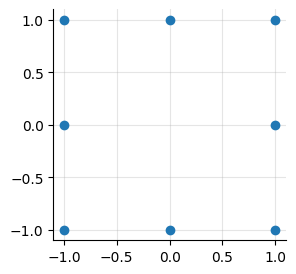

In [6]:
fig, ax = plt.subplots(figsize=(3, 3))
plt.plot(*np.array(orientations).T, 'o')
plt.grid()

In [7]:
num_xmas = 0

for start_row in range(nrow):
    print(f'\r{start_row = }', end='', flush=True)
    for start_col in range(ncol):
        for delta in orientations:
            coords = [(start_row, start_col)]
            for i in range(3):
                prev = coords[-1]
                coords += [(prev[0] + delta[0], prev[1] + delta[1])]
                
            R, C = np.transpose(coords)
            if np.any(
                (R < 0) | (nrow <= R) | (C < 0) | (ncol <= C)
            ):
                continue
                
            word = ''.join(data[R, C])
            if word == 'XMAS':
                num_xmas += 1
    
num_xmas

start_row = 139

2378

## Part 2

In [8]:
num_xmas = 0

for start_row in range(nrow):
    print(f'\r{start_row = }', end='', flush=True)
    for start_col in range(ncol):
        
        if data[start_row, start_col] != 'A':
            continue
            
        corners1 = [(start_row + 1, start_col + 1), (start_row - 1, start_col - 1)]
        corners2 = [(start_row + 1, start_col - 1), (start_row - 1, start_col + 1)]
        all_corners = corners1 + corners2
        
        R1, C1 = np.transpose(corners1)
        R2, C2 = np.transpose(corners2)
        R, C = np.transpose(all_corners)
        if np.any(
            (R < 0) | (nrow <= R) | (C < 0) | (ncol <= C)
        ):
            continue
            
        if set(data[R1, C1]) == set(data[R2, C2]) == {'M', 'S'}:
            num_xmas += 1
    
num_xmas

start_row = 139

1796